In [43]:
import matplotlib.pyplot as plt 
import datetime
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.tsa.stattools as ts
from pandas_datareader import data as pdr
from yahoo_finance import Share
from statsmodels.tsa.stattools import coint
from datetime import datetime
from matplotlib.pyplot import figure
yf.pdr_override()

In [44]:
# Define start and end dates for data retrieval
start = datetime(2016, 1, 1)
end = datetime(2024, 1, 1)


# Define symbols for data retrieval
# Retrieve data from Yahoo Finance using pandas datareader
Symbols = ['^GSPC','BIGPX']
data = pdr.get_data_yahoo(Symbols, start, end)['Close']

[*********************100%%**********************]  2 of 2 completed


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2016-01-04 to 2023-12-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIGPX   2012 non-null   float64
 1   ^GSPC   2012 non-null   float64
dtypes: float64(2)
memory usage: 47.2 KB


In [46]:
data.head()

,BIGPX,^GSPC
Date,,
2016-01-04,11.47,2012.660034
2016-01-05,11.47,2016.709961
2016-01-06,11.37,1990.260010
2016-01-07,11.22,1943.089966
2016-01-08,11.15,1922.030029


In [47]:
# Calculate log returns
returns = np.log(data/data.shift(1))

In [48]:
returns.head()

,BIGPX,^GSPC
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.000000,0.002010
2016-01-06,-0.008757,-0.013202
2016-01-07,-0.013280,-0.023986
2016-01-08,-0.006258,-0.010898


In [49]:
# Drop missing values
returns.dropna(inplace=True)

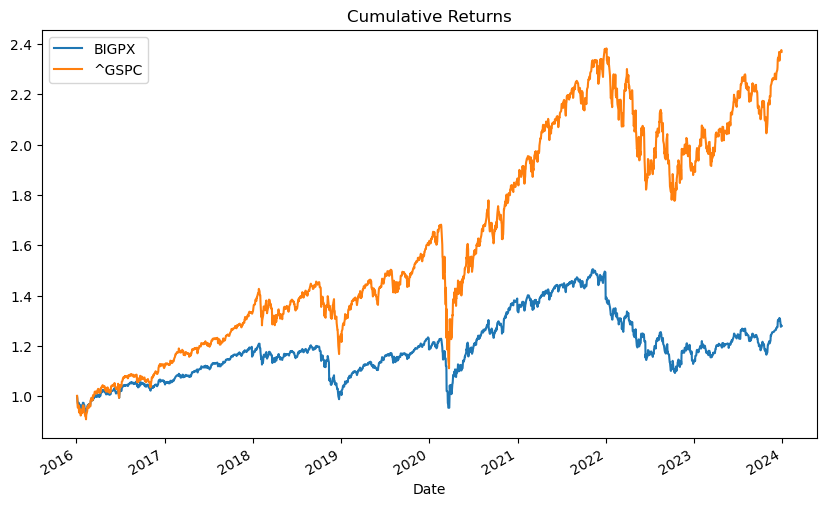

In [50]:
# Plot cumulative returns
returns.cumsum().apply(np.exp).plot(figsize=(10,6));
plt.title("Cumulative Returns")  # Adjust the y parameter to position the title
plt.show();

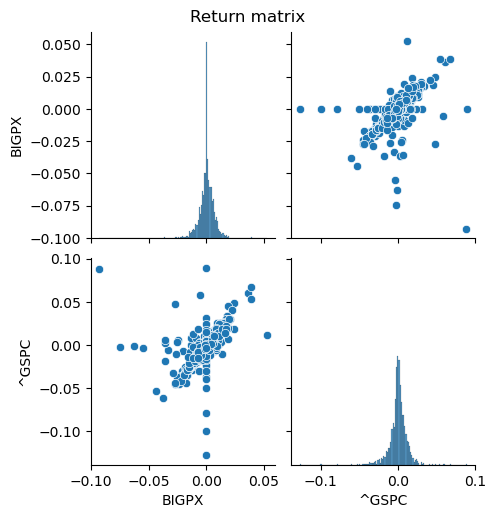

In [51]:
# Plot pairplot for visualizing relationships between variables
sn.pairplot(returns)
plt.suptitle("Return matrix", y=1.02)  # Adjust the y parameter to position the title
plt.show();

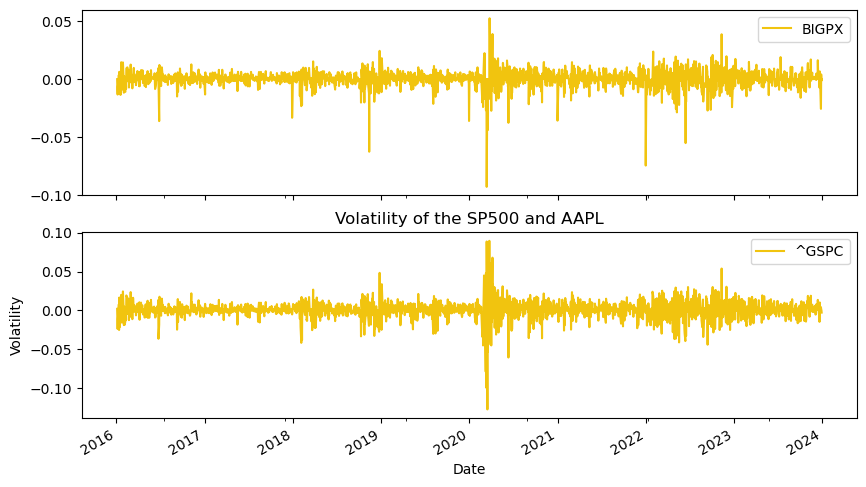

In [52]:
#Plot Volatility
returns.plot(subplots=True, figsize=(10, 6),color='#F1C40F');
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title('Volatility of the SP500 and AAPL');

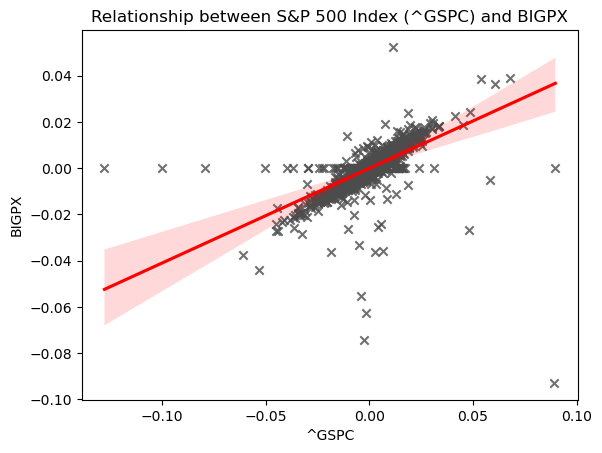

In [55]:
#plot relationship between S&P 500 Index (^GSPC) and BIGPX"
sn.regplot(
    data=returns,x="^GSPC", y="BIGPX",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"))

plt.title("Relationship between S&P 500 Index (^GSPC) and BIGPX")

plt.show()

In [56]:
# Perform ordinary least squares (OLS) regression analysis
X = returns['BIGPX'] 
y = returns['^GSPC']

X = sm.add_constant(X)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^GSPC   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.31e-232
Time:                        16:03:39   Log-Likelihood:                 6609.1
No. Observations:                2011   AIC:                        -1.321e+04
Df Residuals:                    2009   BIC:                        -1.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.518      0.129   -8.95e-05       0.001
BIGPX          1.0000      0.027     37.380      0.000       0.948       1.052
==============================================================================
Omnibus:                     1725.583   Durbin-Watson:                   2.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1251056.832
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                     125.055   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""